In [ ]:
import pandas as pd

In [ ]:
chip=pd.read_csv('/content/chip_dataset.csv')
chip.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [ ]:
chip.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

Converting Release date column to datetime

In [ ]:


chip['Release Date'] = pd.to_datetime(chip['Release Date'])

# Verify the change
chip.head()



<ipython-input-5-f913622364f7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chip['Release Date'] = pd.to_datetime(chip['Release Date'])


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


Droping columns FP16 GFLOPS, FP32 GFLOPS and FP64 GFLOPS because of too many missing values

In [ ]:
chip1=chip.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'],axis=1)
chip1.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,AMD


In [ ]:
chip1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4746 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4508 non-null   object        
 5   Die Size (mm^2)        4593 non-null   object        
 6   Transistors (million)  4390 non-null   object        
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 386.5+ KB


Converting remaing columns to correct dtype and confirming change.

In [ ]:
columns_to_convert = ['TDP (W)', 'Die Size (mm^2)', 'Process Size (nm)','Transistors (million)']
chip1[columns_to_convert] = chip1[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
chip1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4746 non-null   datetime64[ns]
 3   Process Size (nm)      4887 non-null   float64       
 4   TDP (W)                4054 non-null   float64       
 5   Die Size (mm^2)        4229 non-null   float64       
 6   Transistors (million)  4139 non-null   float64       
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4330 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 386.5+ KB


In [ ]:
chip1.isnull().sum()

Product                    0
Type                       0
Release Date             199
Process Size (nm)         58
TDP (W)                  891
Die Size (mm^2)          716
Transistors (million)    806
Freq (GHz)               437
Foundry                  615
Vendor                     0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Columns to impute
columns_to_impute = ['Freq (GHz)','TDP (W)', 'Die Size (mm^2)', 'Process Size (nm)','Transistors (million)']

# Fit and transform
chip1[columns_to_impute] = imputer.fit_transform(chip1[columns_to_impute])

# Confimation of imputation
chip1.isnull().sum()


Product                    0
Type                       0
Release Date             199
Process Size (nm)          0
TDP (W)                    0
Die Size (mm^2)            0
Transistors (million)      0
Freq (GHz)                 0
Foundry                  615
Vendor                     0
dtype: int64

In [ ]:
clomumns_to_fill=['Release Date','Foundry']
chip1[clomumns_to_fill]=chip1[clomumns_to_fill].ffill()

In [ ]:
chip1.tail()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,2024-01-08,8.0,80.0,200.0,8700.0,1042.0,Samsung,NVIDIA
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5.0,220.0,294.0,35800.0,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5.0,285.0,379.0,45900.0,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5.0,320.0,379.0,45900.0,2295.0,TSMC,NVIDIA
4944,NVIDIA RTX 5880 Ada Generation,GPU,2024-01-05,5.0,285.0,609.0,76300.0,1155.0,TSMC,NVIDIA


In [ ]:
chip1.isnull().sum()

Product                   0
Type                      0
Release Date              0
Process Size (nm)         0
TDP (W)                   0
Die Size (mm^2)           0
Transistors (million)     0
Freq (GHz)                0
Foundry                  15
Vendor                    0
dtype: int64

Transistors in GPUs double approximately every 2.45 years


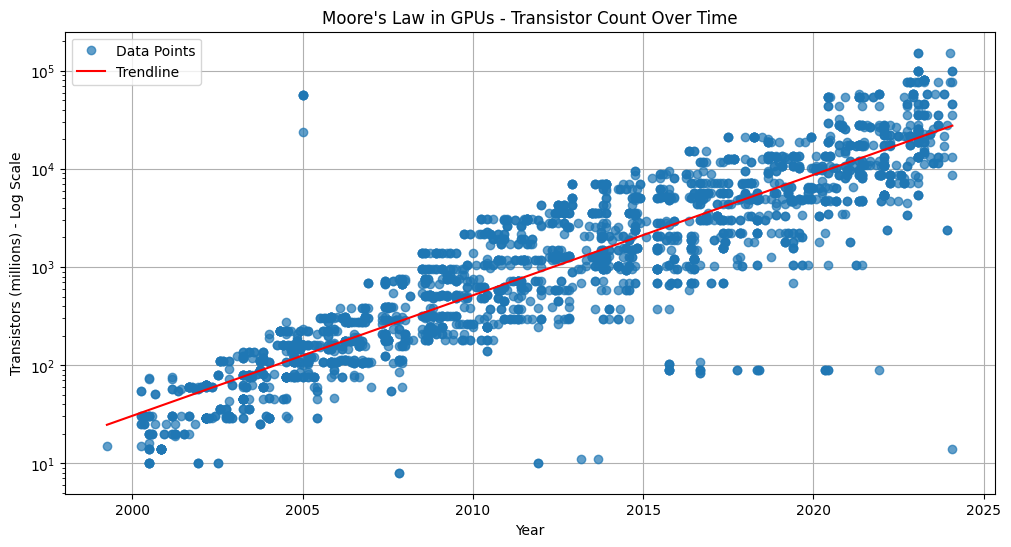

In [ ]:
# Filter for GPUs and sort by release date
gpus = chip1[chip1['Type'] == 'GPU'].sort_values('Release Date')

# Convert release date to numeric (years) for easier plotting
gpus['Year'] = gpus['Release Date'].dt.year + gpus['Release Date'].dt.month / 12

# Plot transistor count over time (log scale for y-axis)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.semilogy(gpus['Year'], gpus['Transistors (million)'], 'o', alpha=0.7, label='Data Points')
plt.xlabel('Year')
plt.ylabel('Transistors (millions) - Log Scale')
plt.title("Moore's Law in GPUs - Transistor Count Over Time")
plt.grid(True)

# Add trendline
import numpy as np
valid_data = gpus.dropna(subset=['Year', 'Transistors (million)'])
x = valid_data['Year'].values.reshape(-1, 1)
y = np.log2(valid_data['Transistors (million)']).values
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

plt.plot(x, 2**y_pred, 'r-', label='Trendline')
plt.legend()

# Calculate doubling rate
doubling_rate = 1 / reg.coef_[0]  # Years per doubling
print(f"Transistors in GPUs double approximately every {doubling_rate:.2f} years")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input y contains infinity or a value too large for dtype('float64').

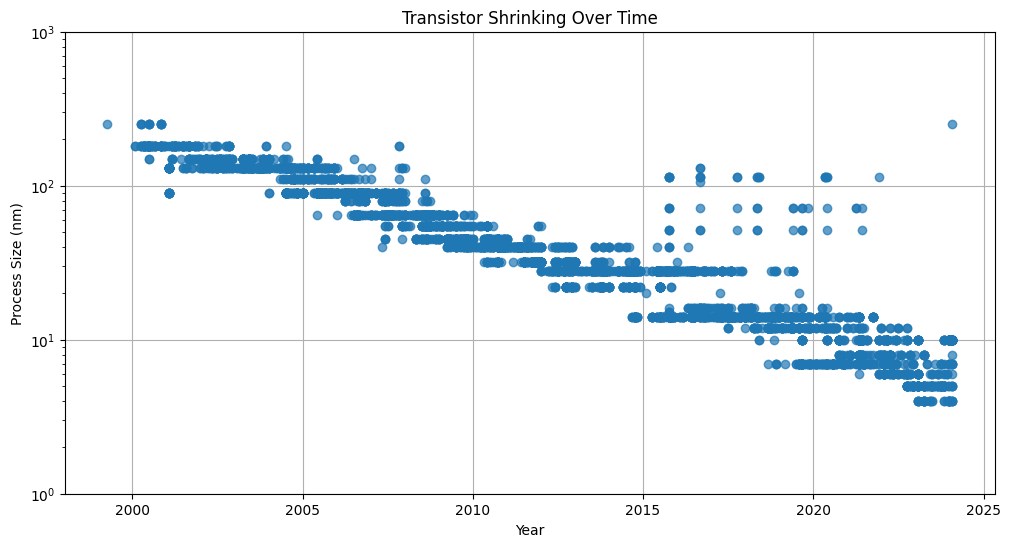

In [ ]:
valid_data = chip1.dropna(subset=['Release Date', 'Process Size (nm)'])
valid_data['Year'] = valid_data['Release Date'].dt.year + valid_data['Release Date'].dt.month / 12

plot_trend(valid_data['Year'], valid_data['Process Size (nm)'], 'Year', 'Process Size (nm)', 'Transistor Shrinking Over Time', logy=True)
plt.ylim(1, 1000)  # Typical range of process sizes

# Add trendline
x = valid_data['Year'].values.reshape(-1, 1)
y = np.log10(valid_data['Process Size (nm)']).values
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
plt.plot(x, 10**y_pred, 'r-', label='Trendline')
plt.legend()

<Axes: >

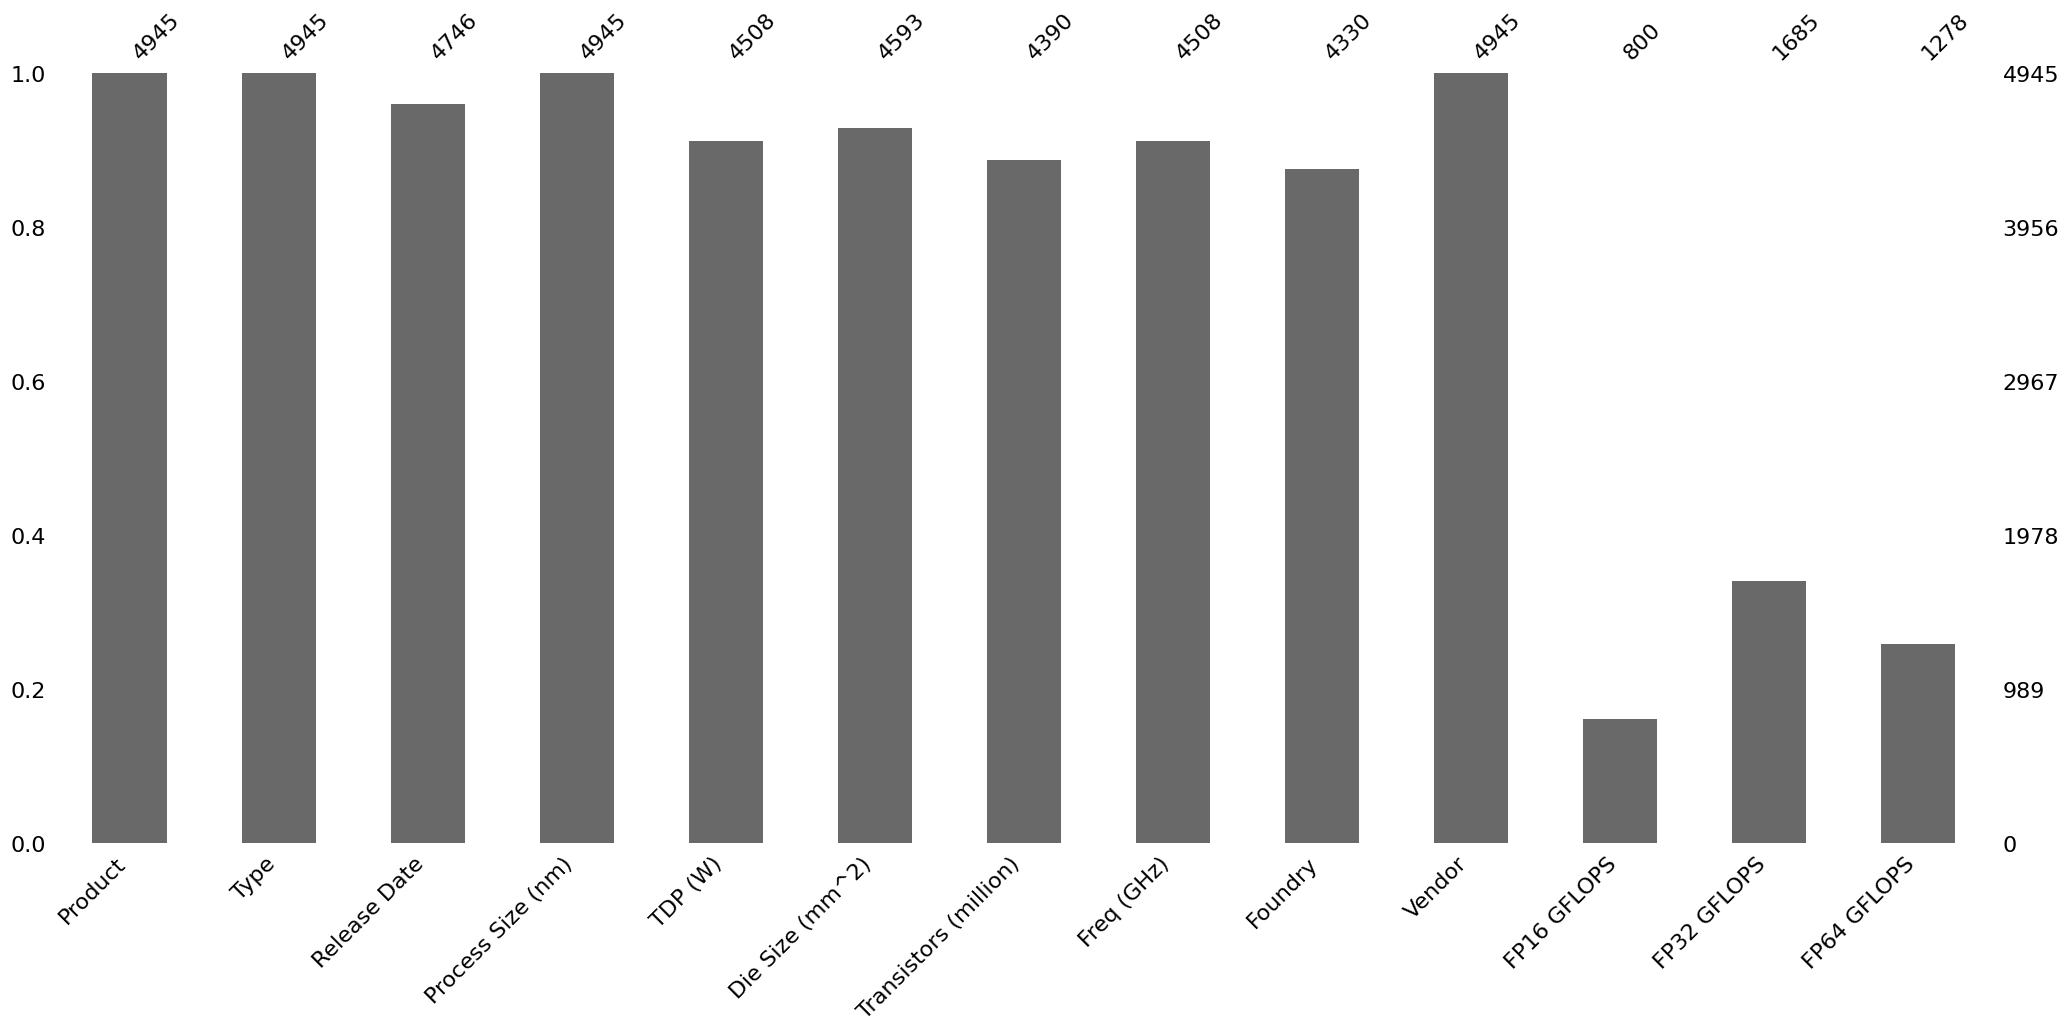

In [ ]:
import missingno as msno
msno.bar(chip)

<Axes: >

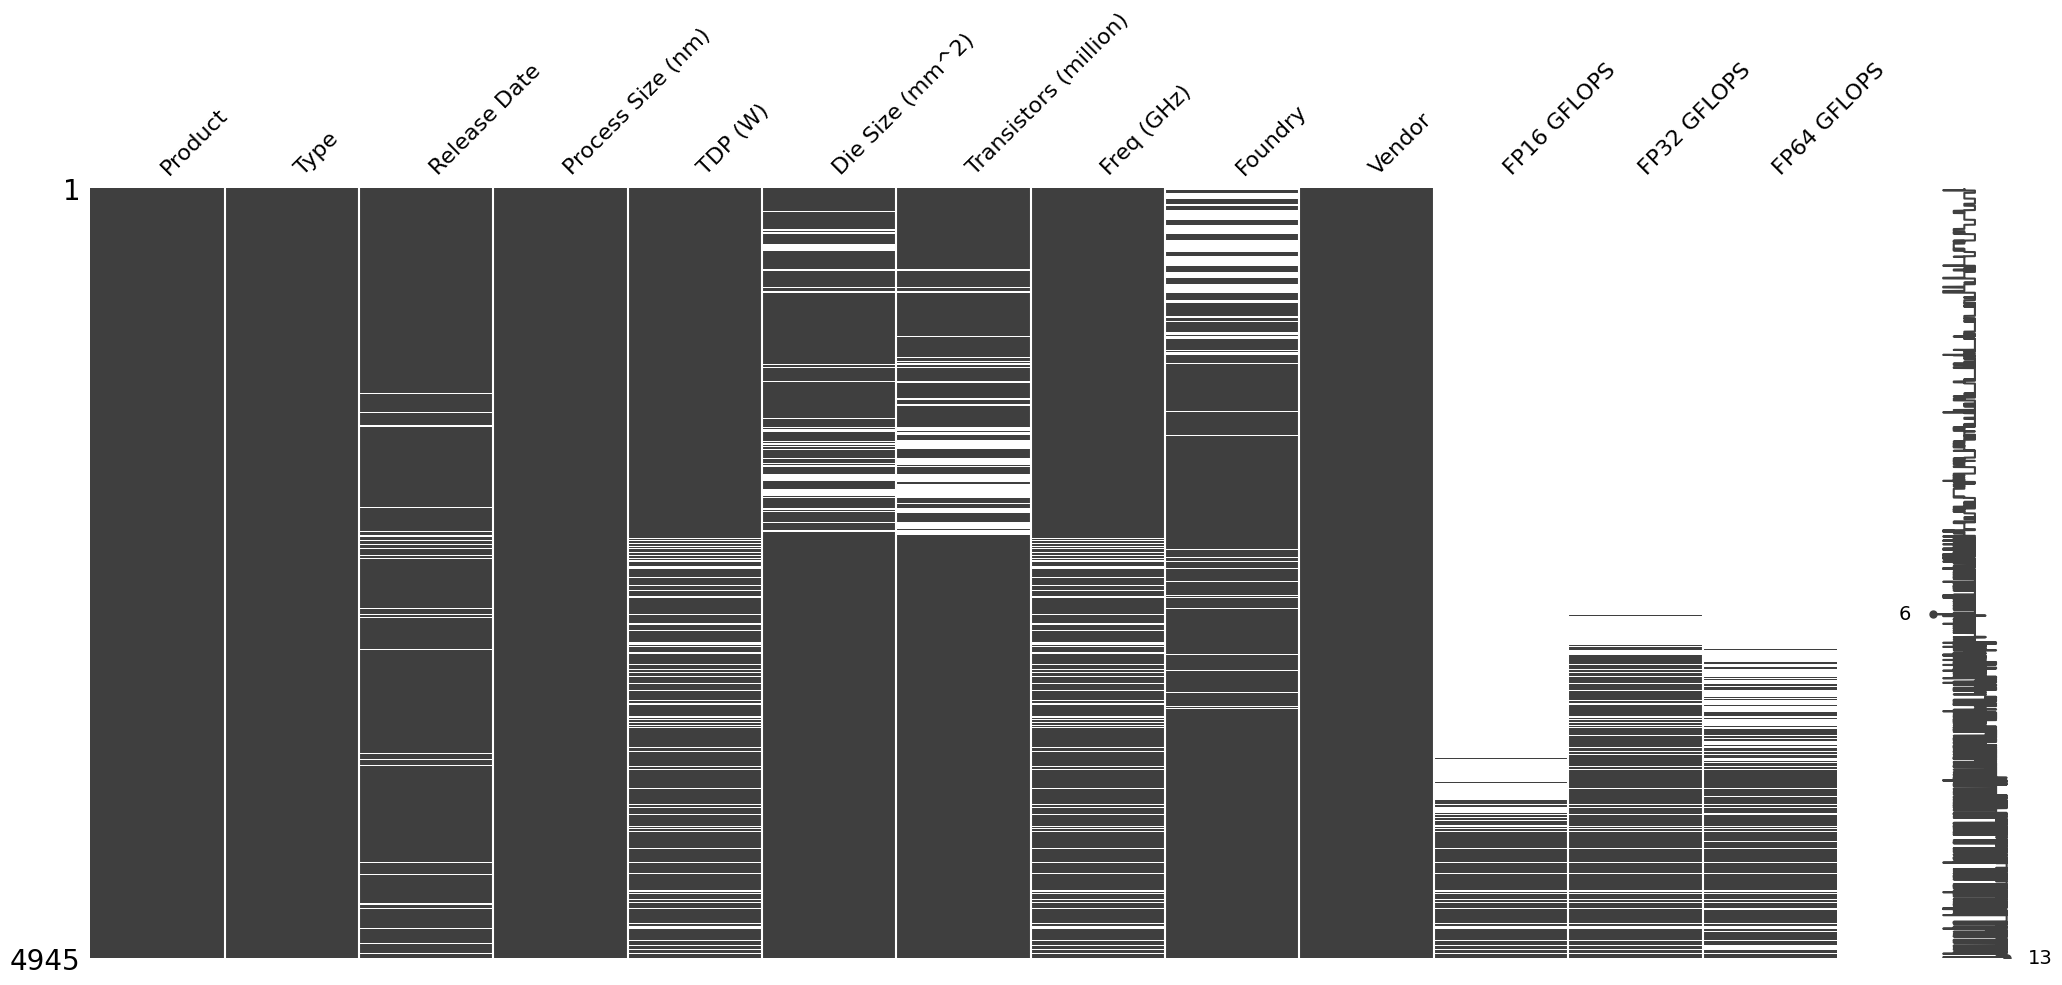

In [ ]:
msno.matrix(chip)

<Axes: >

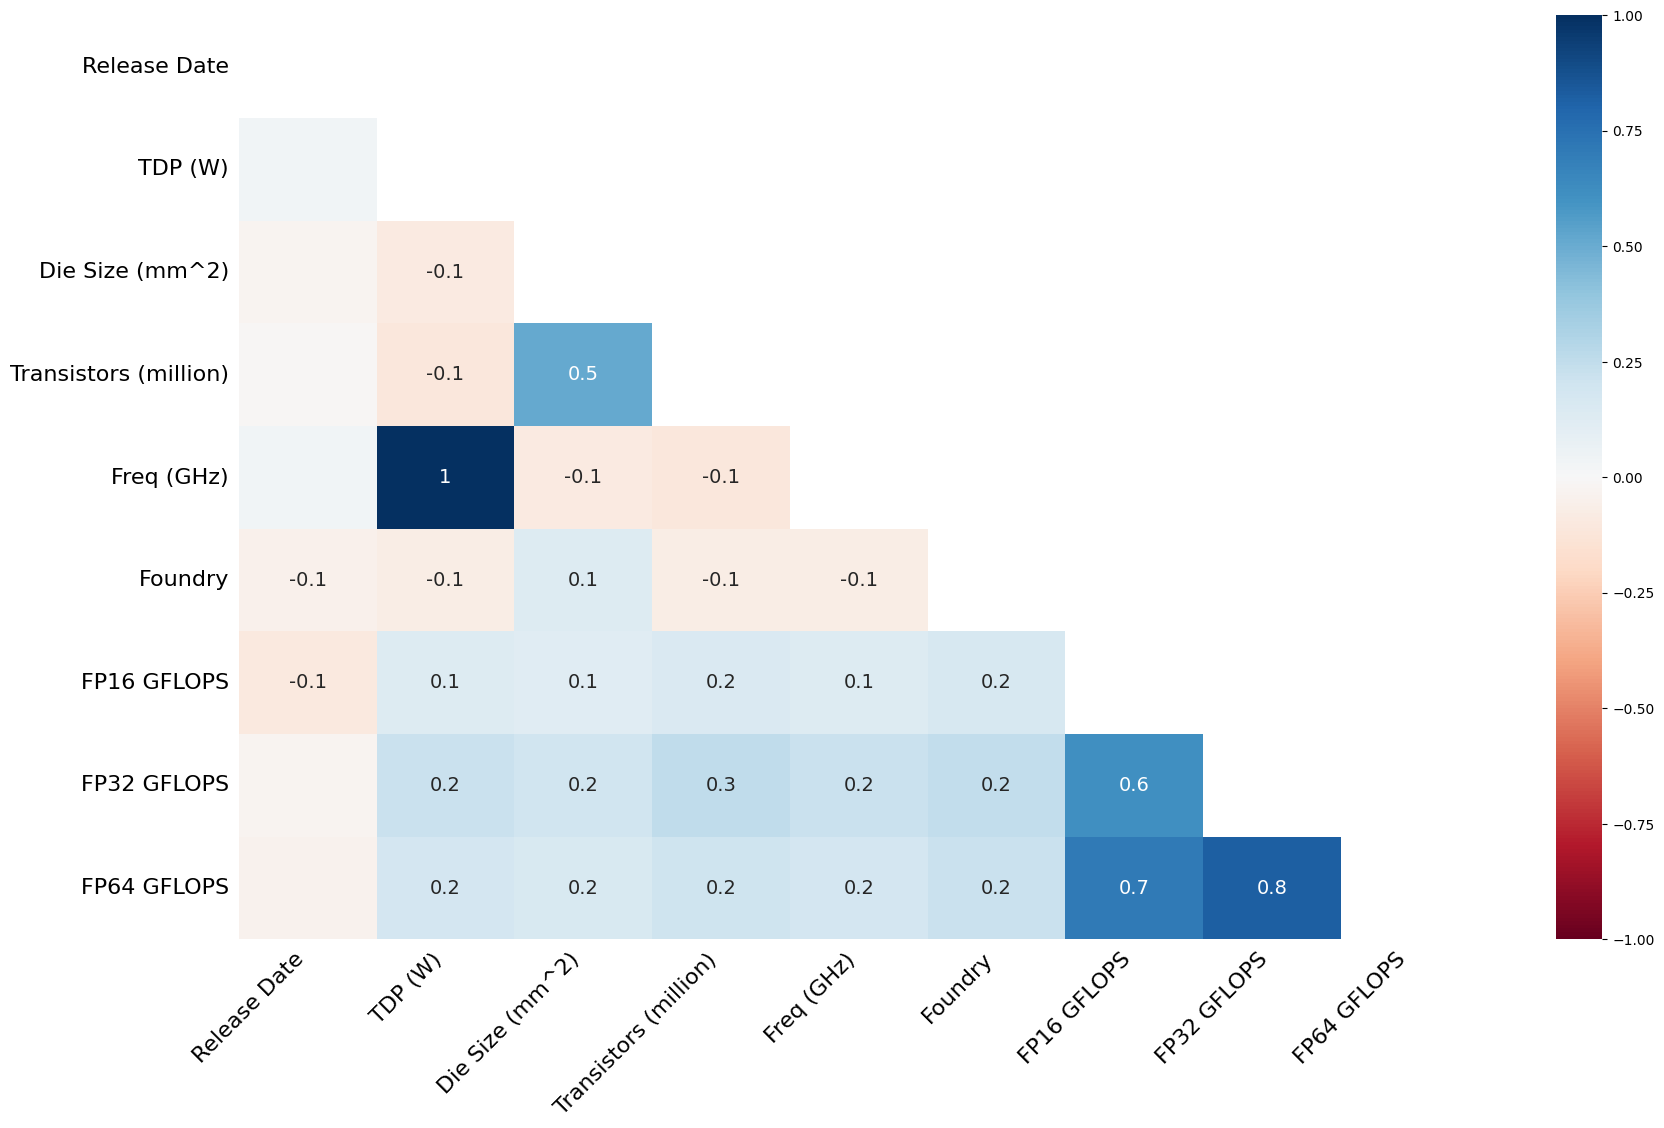

In [ ]:
msno.heatmap(chip)